In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")


In [3]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree

import graphviz
import pandas as pd
from dtreeviz.models.shadow_decision_tree import ShadowDecTree
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees
from sklearn import tree

# Classifier

In [4]:
random_state = 1234
dataset = pd.read_csv("../data/titanic/titanic.csv")
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"
tree_classifier = DecisionTreeClassifier(max_depth=4, random_state=random_state)
tree_classifier.fit(dataset[features], dataset[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

## Initialize shadow tree

In [5]:
sk_dtree = ShadowSKDTree(tree_classifier, dataset[features], dataset[target], features, target, [0, 1])

## Visualizations

### viz_leaf_samples

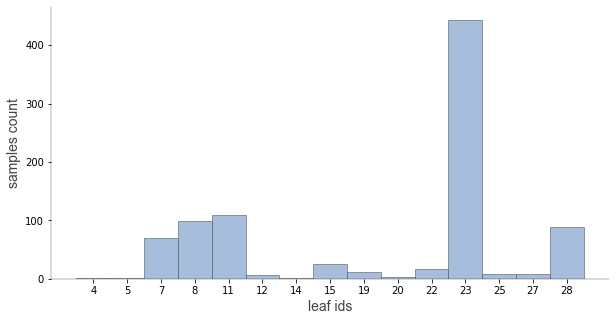

In [6]:
trees.viz_leaf_samples(tree_classifier, dataset[features], features)

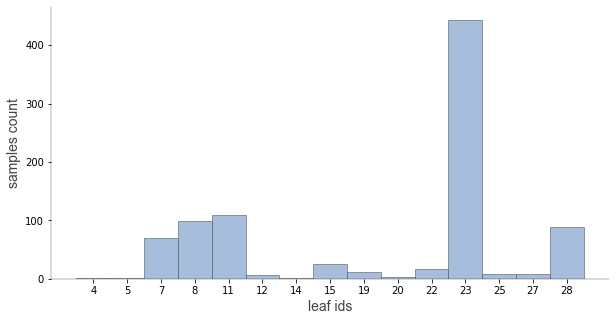

In [7]:
trees.viz_leaf_samples(sk_dtree)

### ctreeviz_leaf_samples

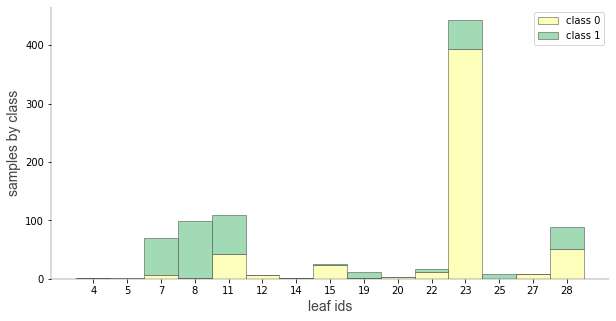

In [8]:
trees.ctreeviz_leaf_samples(tree_classifier, dataset[features], dataset[target], features)

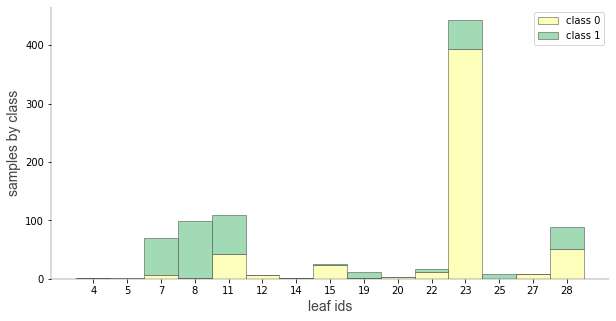

In [9]:
trees.ctreeviz_leaf_samples(sk_dtree)

### dtreeviz

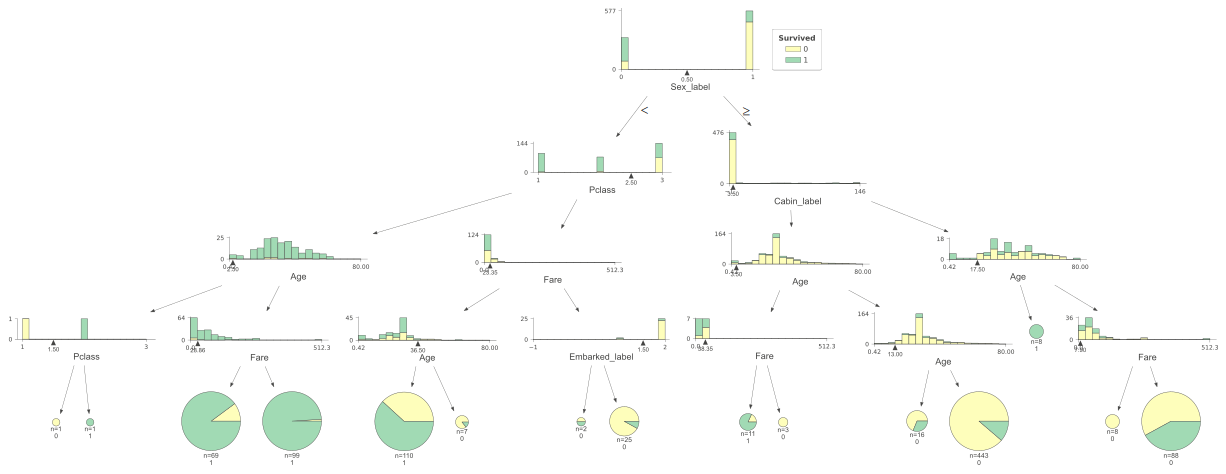

In [12]:
trees.dtreeviz(tree_classifier, dataset[features], dataset[target], features, target, class_names=[0, 1])

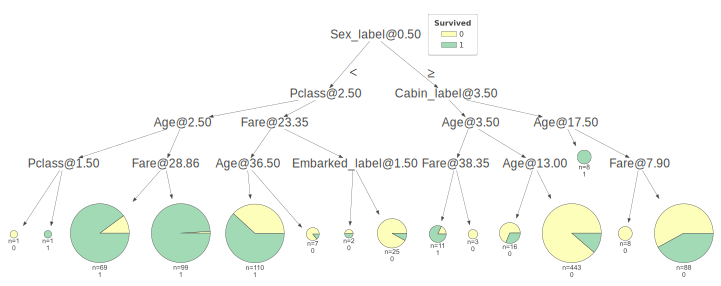

In [11]:
trees.dtreeviz(sk_dtree, fancy=False)

#### show just path

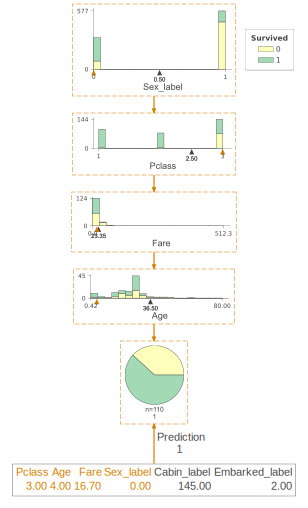

In [12]:
trees.dtreeviz(sk_dtree, show_just_path=True, X = dataset[features].iloc[10])

### viz_leaf_criterion

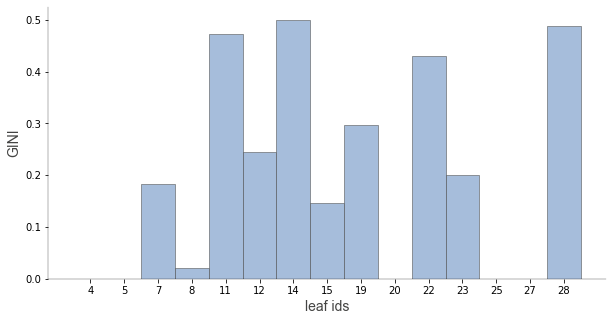

In [13]:
trees.viz_leaf_criterion(tree_classifier)

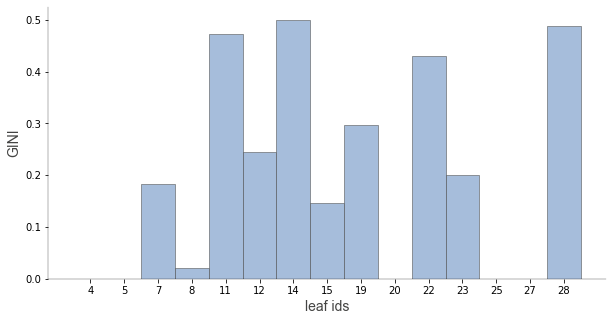

In [14]:
trees.viz_leaf_criterion(sk_dtree)

### describe_node_sample

In [15]:
trees.describe_node_sample(tree_classifier, node_id=10, x_data=dataset[features], feature_names=features)


,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
count,117.0,117.000000,117.000000,117.0,117.000000,117.000000
mean,3.0,23.976667,11.722829,0.0,6.196581,1.341880
std,0.0,10.534377,4.695136,0.0,31.167855,0.789614
min,3.0,0.750000,6.750000,0.0,-1.000000,0.000000
25%,3.0,18.000000,7.775000,0.0,-1.000000,1.000000
50%,3.0,27.000000,9.587500,0.0,-1.000000,2.000000
75%,3.0,29.699118,15.500000,0.0,-1.000000,2.000000
max,3.0,63.000000,23.250000,0.0,145.000000,2.000000


In [16]:
trees.describe_node_sample(sk_dtree, node_id=10)

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
count,117.0,117.000000,117.000000,117.0,117.000000,117.000000
mean,3.0,23.976667,11.722829,0.0,6.196581,1.341880
std,0.0,10.534377,4.695136,0.0,31.167855,0.789614
min,3.0,0.750000,6.750000,0.0,-1.000000,0.000000
25%,3.0,18.000000,7.775000,0.0,-1.000000,1.000000
50%,3.0,27.000000,9.587500,0.0,-1.000000,2.000000
75%,3.0,29.699118,15.500000,0.0,-1.000000,2.000000
max,3.0,63.000000,23.250000,0.0,145.000000,2.000000


### explain_prediction_path

In [17]:
X = dataset[features].iloc[10]
X

Pclass              3.0
Age                 4.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Name: 10, dtype: float64

In [18]:
print(trees.explain_prediction_path(tree_classifier, X, feature_names=features, explanation_type="plain_english"))

2.5 <= Pclass 
Age < 36.5
Fare < 23.35
Sex_label < 0.5



<AxesSubplot:xlabel='features', ylabel='feature importance'>

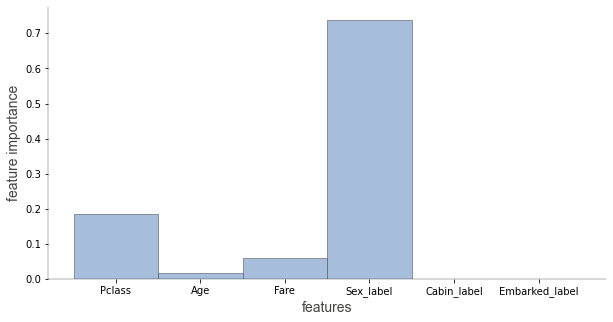

In [19]:
trees.explain_prediction_path(tree_classifier, X, feature_names=features, explanation_type="sklearn_default")

# Regressor

In [15]:
features_reg = ["Pclass", "Fare", "Sex_label", "Cabin_label", "Embarked_label", "Survived"]
target_reg = "Age"
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="mae")
tree_regressor.fit(dataset[features_reg], dataset[target_reg])


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [16]:
sk_dtree_reg = ShadowSKDTree(tree_regressor, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

## Visualizations

### dtreeviz

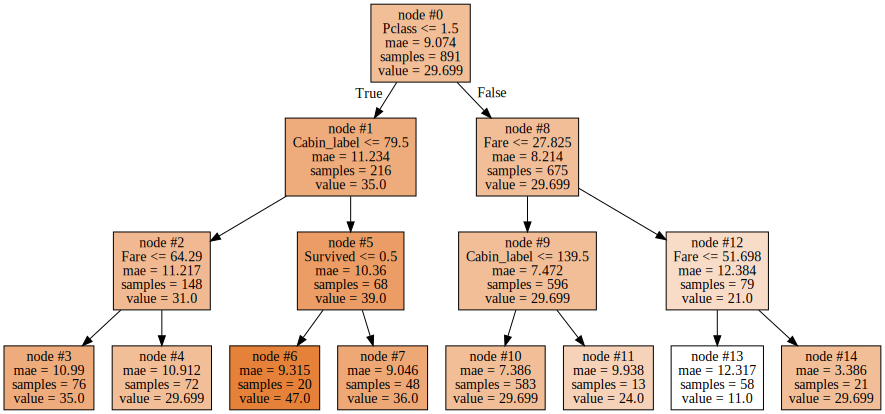

In [20]:
from sklearn import tree as sklearn_tree

dot_data = sklearn_tree.export_graphviz(tree_regressor, out_file=None, feature_names=features_reg,
                                                filled=True, node_ids=True)
graphviz.Source(dot_data)

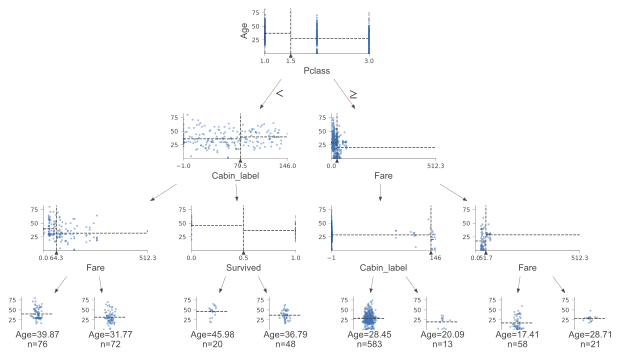

In [21]:
trees.dtreeviz(tree_regressor, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

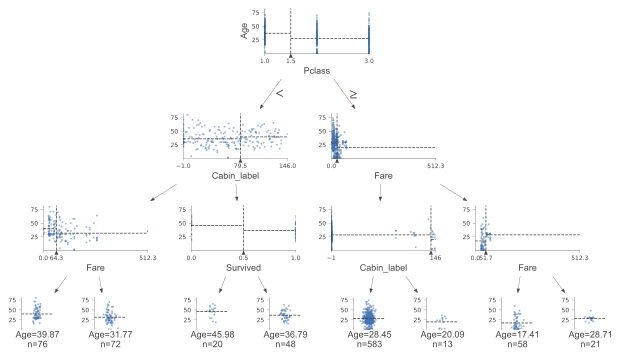

In [22]:
trees.dtreeviz(tree_regressor, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

#### show just path

In [23]:
x = dataset[features_reg].iloc[10]
x

Pclass              3.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Survived            1.0
Name: 10, dtype: float64

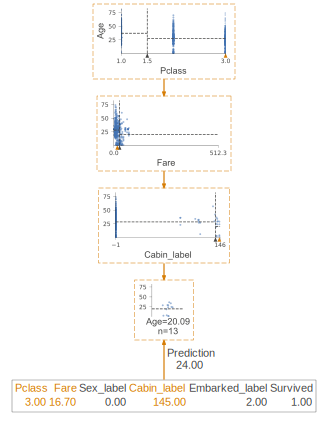

In [24]:
trees.dtreeviz(sk_dtree_reg, show_just_path=True, X = x)

### viz_leaf_samples

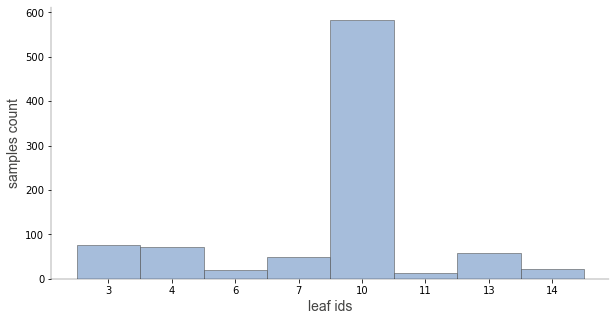

In [25]:
trees.viz_leaf_samples(tree_regressor, dataset[features_reg], features_reg)

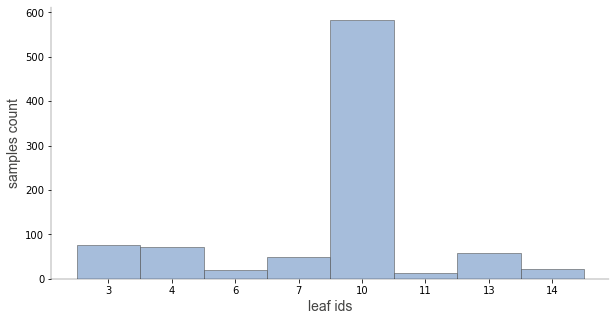

In [26]:
trees.viz_leaf_samples(sk_dtree_reg)

### viz_leaf_criterion

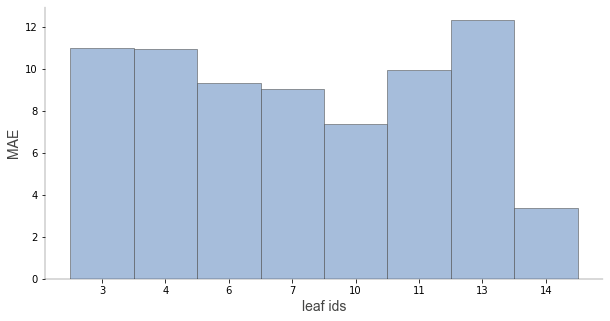

In [27]:
trees.viz_leaf_criterion(tree_regressor)

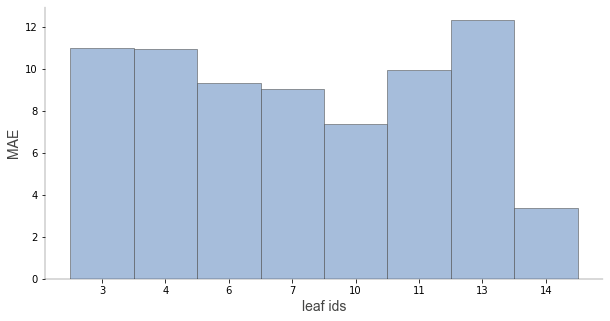

In [28]:
trees.viz_leaf_criterion(sk_dtree_reg)

### viz_leaf_target

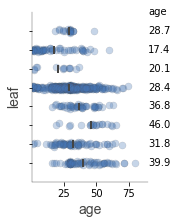

In [29]:
trees.viz_leaf_target(tree_regressor, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

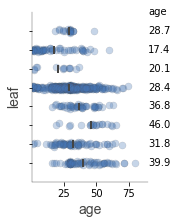

In [30]:
trees.viz_leaf_target(sk_dtree_reg)

### describe_node_sample

In [31]:
trees.describe_node_sample(tree_regressor, node_id=1, x_data=dataset[features], feature_names=features_reg)

,Pclass,Fare,Sex_label,Cabin_label,Embarked_label,Survived
count,216.0,216.000000,216.000000,216.000000,216.000000,216.000000
mean,1.0,37.048118,84.154687,0.564815,54.773148,1.175926
std,0.0,14.046369,78.380373,0.496933,43.781906,0.996073
min,1.0,0.920000,0.000000,0.000000,-1.000000,-1.000000
25%,1.0,29.000000,30.923950,0.000000,13.750000,0.000000
50%,1.0,35.000000,60.287500,1.000000,53.500000,2.000000
75%,1.0,47.250000,93.500000,1.000000,91.250000,2.000000
max,1.0,80.000000,512.329200,1.000000,146.000000,2.000000


In [32]:
trees.describe_node_sample(sk_dtree_reg, node_id=1)

,Pclass,Fare,Sex_label,Cabin_label,Embarked_label,Survived
count,216.0,216.000000,216.000000,216.000000,216.000000,216.000000
mean,1.0,84.154687,0.564815,54.773148,1.175926,0.629630
std,0.0,78.380373,0.496933,43.781906,0.996073,0.484026
min,1.0,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,1.0,30.923950,0.000000,13.750000,0.000000,0.000000
50%,1.0,60.287500,1.000000,53.500000,2.000000,1.000000
75%,1.0,93.500000,1.000000,91.250000,2.000000,1.000000
max,1.0,512.329200,1.000000,146.000000,2.000000,1.000000


### explain_prediction_path

In [33]:
X_reg = dataset[features_reg].iloc[10]
X_reg

Pclass              3.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Survived            1.0
Name: 10, dtype: float64

In [34]:
print(trees.explain_prediction_path(tree_regressor, X_reg, feature_names=features_reg, explanation_type="plain_english"))

1.5 <= Pclass 
Fare < 27.82
139.5 <= Cabin_label 



In [35]:
print(trees.explain_prediction_path(sk_dtree_reg, X_reg, "plain_english"))

1.5 <= Pclass 
Fare < 27.82
139.5 <= Cabin_label 



<AxesSubplot:xlabel='features', ylabel='feature importance'>

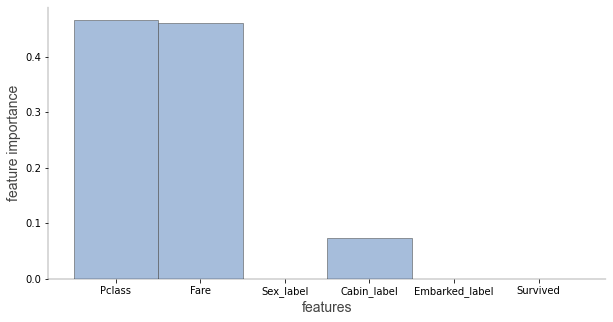

In [36]:
trees.explain_prediction_path(tree_regressor, X_reg, feature_names=features_reg, explanation_type="sklearn_default")

AxesSubplot(0.125,0.125;0.775x0.755)


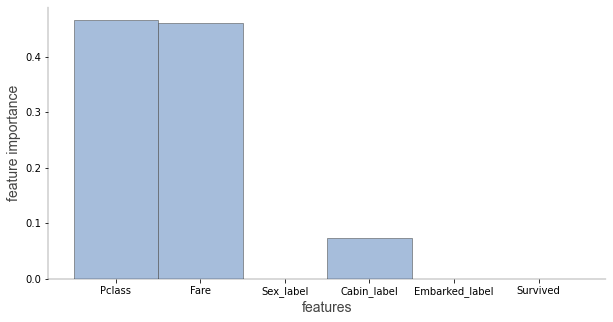

In [37]:
print(trees.explain_prediction_path(sk_dtree_reg, X_reg, explanation_type="sklearn_default"))

### rtreeviz_univar

In [38]:
features_reg_univar = ["Pclass"]
target_reg = "Age"
dtr_univar = DecisionTreeRegressor(max_depth=2, random_state=random_state, criterion="mae")
dtr_univar.fit(dataset[features_reg_univar], dataset[target_reg])


DecisionTreeRegressor(criterion='mae', max_depth=2, random_state=1234)

In [39]:
skdtree_univar = ShadowSKDTree(dtr_univar, dataset[features_reg_univar], dataset[target_reg], features_reg_univar, target_reg)

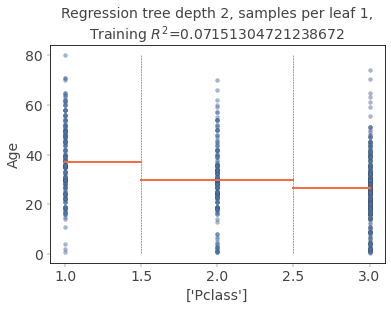

In [40]:
trees.rtreeviz_univar(dtr_univar, dataset[features_reg_univar], dataset[target_reg], features_reg_univar, target_reg)


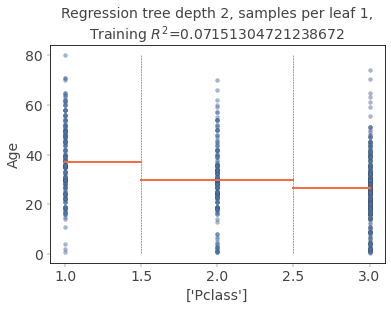

In [41]:
trees.rtreeviz_univar(skdtree_univar)

### rtreeviz_bivar_3D

In [42]:
features_reg_bivar = ["Age", "Fare"]
target_reg = "Pclass"
dtr_bivar = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="mae")
dtr_bivar.fit(dataset[features_reg_bivar], dataset[target_reg])


DecisionTreeRegressor(criterion='mae', max_depth=3, random_state=1234)

In [43]:
skdtree_bivar = ShadowSKDTree(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

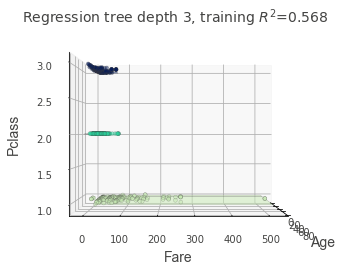

In [44]:
trees.rtreeviz_bivar_3D(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)


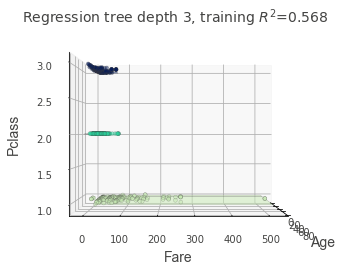

In [45]:
trees.rtreeviz_bivar_3D(skdtree_bivar)

### rtreeviz_bivar_heatmap

In [46]:
features_reg_bivar = ["Pclass", "Fare"]
target_reg = "Age"
dtr_bivar = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="mae")
dtr_bivar.fit(dataset[features_reg_bivar], dataset[target_reg])


DecisionTreeRegressor(criterion='mae', max_depth=3, random_state=1234)

In [47]:
skdtree_bivar = ShadowSKDTree(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

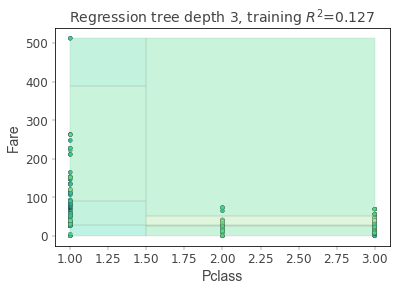

In [48]:
trees.rtreeviz_bivar_heatmap(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

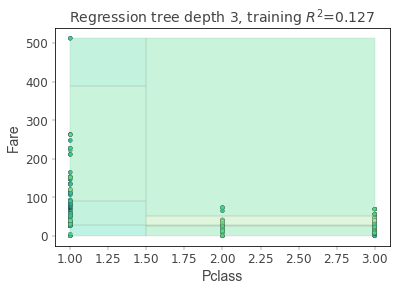

In [49]:
trees.rtreeviz_bivar_heatmap(skdtree_bivar)